# EAS2655: Week 9 Correlation map- NINO3.4
Pengfei Liu
pengfei.liu@eas.gatech.edu

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs
import scipy.stats as stats

### Load and process NINO3.4 data

In [18]:
# data loading
# Nino3.4 index downloaded from:
# https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni

# df=pd.read_csv('./nino34_1870_2020.txt', delim_whitespace=True, header=None)
# alternatively, you could use the following command to read the whitespece separated data file
# df=pd.read_csv('./nino34_1870_2020.txt', delimiter=r"\s+", header=None)

df=pd.read_csv('./nino34_1870_2020.txt', delimiter="\t", header=None)

# replace invalid values with NaN 
df=df.replace(-99.99,np.nan)
print(df)
# convert dataframe to numpy matrix
data=df.values

year=data[:,0]
nino34=data[:,1:]

tr=(1948,2021)

tind=((year>=tr[0])&(year<tr[1]))

year_sel=year[tind]
nino34_sel=nino34[tind,:]

(ny,nm)=np.shape(nino34_sel)

       0      1      2      3      4      5      6      7      8      9   \
0    1870  25.58  25.57  26.43  26.96  26.59  26.61  26.19  25.99  26.22   
1    1871  26.33  26.18  26.83  27.27  27.16  27.16  26.62  26.54  26.51   
2    1872  25.86  26.14  26.76  27.00  27.25  27.16  26.91  26.02  25.73   
3    1873  25.79  25.75  25.95  27.10  27.33  27.21  26.65  26.48  26.41   
4    1874  25.64  25.70  25.85  26.83  27.00  26.96  26.22  25.82  25.62   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
147  2017  26.24  26.75  27.17  27.99  28.17  27.91  27.44  26.69  26.20   
148  2018  25.72  26.03  26.53  27.41  27.75  27.81  27.49  26.93  27.05   
149  2019  27.09  27.38  28.06  28.44  28.48  28.34  27.64  27.07  26.86   
150  2020  27.22  27.25  27.62  28.26  27.74  27.48  27.18  26.46  26.09   
151  2021  25.54  25.82  26.54  27.22  27.45  27.63  27.03    NaN    NaN   

        10     11     12  
0    25.82  25.86  25.79  
1    26.40  26.35  26.01  
2    2

### Example 1: Calculate anomaly for all months to remove seasonal cycle

In [3]:
nino34_mean=np.mean(nino34_sel,axis=0)
nino34_mean

# note that nino34_sel and nino34_mean have different dimensions
# the calculate below utilize the broadcasting rule of numpy

# read more: https://numpy.org/doc/stable/user/basics.broadcasting.html
nino34_anomaly=nino34_sel-nino34_mean #
np.shape(nino34_anomaly)

nino34_ano_ser=nino34_anomaly.reshape(-1,order='C')
nino34_ano_ser

array([ 1.03561644e-01,  3.96027397e-01,  6.99041096e-01,  2.81369863e-01,
        3.90821918e-01,  1.33013699e-01,  6.57534247e-03,  2.12328767e-02,
        6.95890411e-02, -6.17534247e-01, -2.41780822e-01,  4.00136986e-01,
       -4.06438356e-01,  2.86027397e-01, -4.90958904e-01,  2.21369863e-01,
        1.08219178e-02, -6.46986301e-01, -3.13424658e-01, -2.68767123e-01,
       -5.60410959e-01, -6.67534247e-01, -1.26178082e+00, -1.16986301e+00,
       -9.96438356e-01, -1.47397260e+00, -1.01095890e+00, -8.78630137e-01,
       -1.21917808e+00, -7.96986301e-01, -1.01342466e+00, -5.88767123e-01,
       -1.01041096e+00, -7.77534247e-01, -1.32178082e+00, -1.00986301e+00,
       -1.07643836e+00, -7.13972603e-01, -7.10958904e-01, -1.38630137e-01,
       -9.17808219e-03, -1.69863014e-02,  7.26575342e-01,  9.41232877e-01,
        7.59589041e-01,  8.42465753e-01,  8.48219178e-01,  7.40136986e-01,
        4.43561644e-01,  2.66027397e-01,  1.09041096e-01,  4.41369863e-01,
       -2.99178082e-01, -

In [4]:
year_sel
month=np.arange(1,13,1)
(m_mat,y_mat)=np.meshgrid(month,year_sel)
T_mat=y_mat+(m_mat-1)/12
T_ser=T_mat.flatten()
T_ser

array([1948.        , 1948.08333333, 1948.16666667, 1948.25      ,
       1948.33333333, 1948.41666667, 1948.5       , 1948.58333333,
       1948.66666667, 1948.75      , 1948.83333333, 1948.91666667,
       1949.        , 1949.08333333, 1949.16666667, 1949.25      ,
       1949.33333333, 1949.41666667, 1949.5       , 1949.58333333,
       1949.66666667, 1949.75      , 1949.83333333, 1949.91666667,
       1950.        , 1950.08333333, 1950.16666667, 1950.25      ,
       1950.33333333, 1950.41666667, 1950.5       , 1950.58333333,
       1950.66666667, 1950.75      , 1950.83333333, 1950.91666667,
       1951.        , 1951.08333333, 1951.16666667, 1951.25      ,
       1951.33333333, 1951.41666667, 1951.5       , 1951.58333333,
       1951.66666667, 1951.75      , 1951.83333333, 1951.91666667,
       1952.        , 1952.08333333, 1952.16666667, 1952.25      ,
       1952.33333333, 1952.41666667, 1952.5       , 1952.58333333,
       1952.66666667, 1952.75      , 1952.83333333, 1952.91666

### calculate z-score

In [5]:
z_nino34=(nino34_ano_ser-np.mean(nino34_ano_ser))/np.std(nino34_ano_ser,ddof=1)
print(np.mean(z_nino34))
print(np.std(z_nino34,ddof=1))

0.0
1.0


### Example 2: calculate the anomaly for one month (i.e., homework)

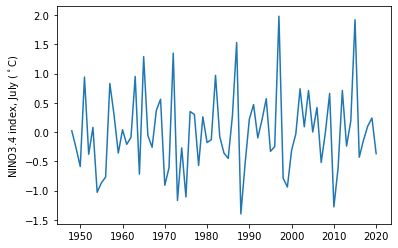

In [25]:
# get July nino34 SST
nino34_JUL=nino34_sel[:,7]
# get nino34 SST anomaly (i.e., nino3.4 index)
nino34_ano_JUL=nino34_JUL-np.mean(nino34_JUL)

x=year_sel
y=nino34_ano_JUL

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('NINO3.4 index, July ($^\circ$C)')
plt.show()

### Make a simple plot

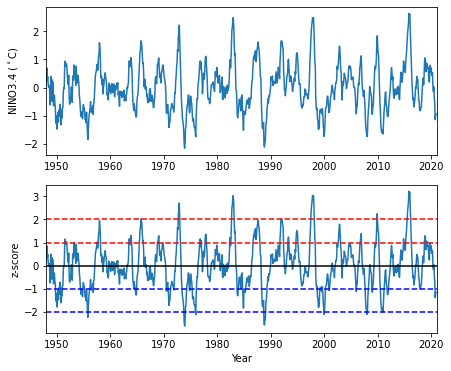

In [6]:
# make a simple plot
fig=plt.figure(figsize=(7, 6)) # define figure size, unit: inches
ax=fig.add_subplot(211)
plt.plot(T_ser,nino34_ano_ser,label='NINO3.4') 
# plt.xlabel('Year')
plt.ylabel('NINO3.4 ($^\circ$C)')
xl=(1948,2021)
plt.xlim(xl)

ax=fig.add_subplot(212)
plt.plot(T_ser,z_nino34,label='Z-score, NINO3.4') 
plt.xlabel('Year')
plt.ylabel('z-score')
plt.xlim(xl)

plt.plot(xl,(0,0),'-k')
plt.plot(xl,(-1,-1),'--b')
plt.plot(xl,(-2,-2),'--b')
plt.plot(xl,(1,1),'--r')
plt.plot(xl,(2,2),'--r')

fn='Fig_nino34_1948_2020'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()

### load and process NCEP data

In [7]:
# load netcdf data
fn='./air.mon.mean.nc'
ds=xr.open_dataset(fn)
# select time range
TMP=ds.air.sel(time=slice("1948-01-01","2020-12-31"))
TMP

<xarray.DataArray 'air' (time: 876, lat: 73, lon: 144)>
[9208512 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]

In [8]:
# calculate anomalies for NCEP data
TMP_mean = TMP.groupby("time.month").mean("time")
TMP_mean
# Here we are using the broadcasting feature of xarray
TMP_anomaly = TMP.groupby("time.month") - TMP_mean
TMP_anomaly

<xarray.DataArray 'air' (time: 876, lat: 73, lon: 144)>
array([[[-4.8099575e+00, -4.8099575e+00, -4.8099575e+00, ...,
         -4.8099575e+00, -4.8099575e+00, -4.8099575e+00],
        [-4.0344048e+00, -4.0661564e+00, -4.1033592e+00, ...,
         -3.9566956e+00, -3.9815025e+00, -4.0026073e+00],
        [-3.3651485e+00, -3.3421135e+00, -3.3566475e+00, ...,
         -3.5432491e+00, -3.4636269e+00, -3.4013844e+00],
        ...,
        [ 3.4112434e+00,  3.3755207e+00,  3.3435040e+00, ...,
          3.4793968e+00,  3.4644279e+00,  3.4395866e+00],
        [ 4.5115891e+00,  4.5231171e+00,  4.5277977e+00, ...,
          4.4460144e+00,  4.4685326e+00,  4.4922371e+00],
        [ 4.7695465e+00,  4.7695465e+00,  4.7695465e+00, ...,
          4.7695465e+00,  4.7695465e+00,  4.7695465e+00]],

       [[-2.6785450e+00, -2.6785450e+00, -2.6785450e+00, ...,
         -2.6785450e+00, -2.6785450e+00, -2.6785450e+00],
        [-3.1937675e+00, -3.0759373e+00, -2.9523277e+00, ...,
         -3.5538025e+00, -3.4370899e+00, -3.3212070e+00],
        [-2.9102249e+00, -2.7396202e+00, -2.5935192e+00, ...,
         -3.5460205e+00, -3.3136253e+00, -3.1037865e+00],
...
        [ 3.9918060e+00,  3.9429779e+00,  3.8905182e+00, ...,
          4.0688076e+00,  4.0587769e+00,  4.0296249e+00],
        [ 2.9744015e+00,  2.9872398e+00,  3.0007210e+00, ...,
          2.9409389e+00,  2.9516506e+00,  2.9626713e+00],
        [ 3.2196426e+00,  3.2196426e+00,  3.2196426e+00, ...,
          3.2196426e+00,  3.2196426e+00,  3.2196426e+00]],

       [[ 6.2450085e+00,  6.2450085e+00,  6.2450085e+00, ...,
          6.2450085e+00,  6.2450085e+00,  6.2450085e+00],
        [ 6.8981209e+00,  6.9761868e+00,  7.0572472e+00, ...,
          6.6588535e+00,  6.7376060e+00,  6.8210354e+00],
        [ 4.8359394e+00,  5.0083523e+00,  5.1628628e+00, ...,
          4.2579460e+00,  4.4644070e+00,  4.6601582e+00],
        ...,
        [-6.1639023e-01, -6.6768265e-01, -7.1031189e-01, ...,
         -3.8935280e-01, -4.6897697e-01, -5.4810333e-01],
        [-3.8196945e-01, -4.0208626e-01, -4.0835571e-01, ...,
         -3.2198906e-01, -3.4528160e-01, -3.6100769e-01],
        [-6.1473846e-03, -6.1473846e-03, -6.1473846e-03, ...,
         -6.1473846e-03, -6.1473846e-03, -6.1473846e-03]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

### calculate the correlation coefficient and make a map

In [9]:
da=TMP_anomaly
nlon=da.lon.size
nlat=da.lat.size

In [11]:
# define a function in python
def regrcorr2(X,Y,CL):
    C=np.cov(X,Y)
    # slope
    a=np.empty(2)
    a[0]=C[0,1]/C[0,0]
    # intercept
    a[1]=np.mean(Y)-a[0]*np.mean(X)
    # correlation coefficient
    r=C[0,1]/np.sqrt(C[0,0]*C[1,1])    
    # sample size
    N=np.size(Y)    
    # lag-1 autocorrelation for Y
    y0=Y[0:-1]
    y1=Y[1:]
    Cy=np.cov(y0,y1)
    r1=Cy[0,1]/np.sqrt(Cy[0,0]*Cy[1,1])
    # effective sample size
    Neff=N*(1-r1)/(1+r1)
    Neff=min(N,Neff)
    # SE of regression
    Y_pred=a[0]*X+a[1]
    err2=sum(np.square(Y-Y_pred))/(Neff-2)
    SE2=err2/sum(np.square(X-np.mean(X)))
    SE=np.sqrt(SE2)
    # calculate tcrit (two-tailed)
    tcrit=stats.t.ppf((1+CL)/2,Neff-2)
    CI=tcrit*SE
    return a,r,CI  

In [12]:
# calculate correlation coefficient
r_mat=np.empty((nlat,nlon))
slope=np.empty((nlat,nlon))
confint=np.empty((nlat,nlon))
# r_mat[:]=np.nan
y=nino34_ano_ser

# CL
CL=0.99
for ii in np.arange(0,nlon):
    for jj in np.arange(0,nlat):
        x=TMP_anomaly.isel(lat=jj,lon=ii).values
        a,r,CI=regrcorr2(x,y,CL)
#         r=np.corrcoef(x,y)
        r_mat[jj,ii]=r
        slope[jj,ii]=a[0]
        confint[jj,ii]=CI

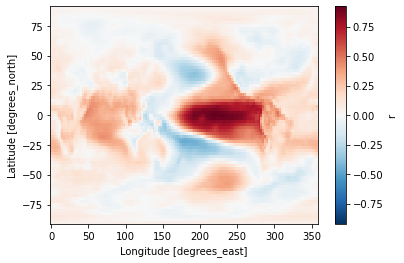

In [13]:
# re-assemble the data array and save it as netcdf
da=xr.DataArray(data=r_mat,dims=['lat','lon'],coords=dict(lat=TMP_anomaly.lat,lon=TMP_anomaly.lon),name='r')

# save the data to netcdf
ds_out=da.to_dataset()
ds_out.to_netcdf('./ncep_nino34_r.nc')

# make a simple plot
da.plot()
plt.show()

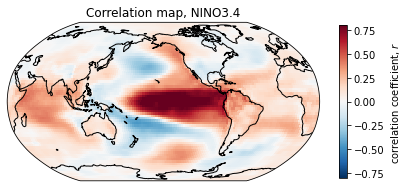

In [15]:
X=da.lon.values
Y=da.lat.values
Z=da.values

# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)


fig=plt.figure(figsize=(7, 4))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-150))
ax.coastlines()
cf=plt.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-0.8,vmax=0.8,rasterized=True)
fig.colorbar(cf, ax=ax,shrink=0.7, label='correlation coefficient, $\itr$')
ax.set_title('Correlation map, NINO3.4')

fn='Fig_ncep_nino34_correlation_plot'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()